In [1]:
from datascience import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import patches
%matplotlib inline 
from matplotlib.pyplot import figure
pd.plotting.register_matplotlib_converters()
import seaborn as sns
from pylab import *
from ipywidgets import interact
from IPython.lib.display import YouTubeVideo

<table style="width: 100%;">
    <tr style="background-color: transparent;"><td>
        <img src="https://data-88e.github.io/assets/images/blue_text.png" width="250px" style="margin-left: 0;" />
    </td><td>
        <p style="text-align: right; font-size: 10pt;"><strong>Economic Models</strong>, Spring 2022<br>
            Peter Grinde-Hollevik<br> 
            Dr. Eric Van Dusen<br>
            Ray Zhou
        </p></td></tr>
</table>

# Rosling Plots
This notebook is inspired by the late Professor Hans Rösling's wonderful contributions to the world of data visualization, which can be seen at the Gapminder website. 

[You can see the Gapminder version of this visualization here](https://www.gapminder.org/tools/#$model$markers$bubble$encoding$y$data$concept=co2_emissions_tonnes_per_person&space@=country&=time;;&scale$domain:null&zoomed:null&type:null;;&frame$value=2018;;;;;&chart-type=bubbles&url=v1).  

This notebook aims to reproduce the "bubble charts" in understanding the historical, global emissions of the last century.

As a warm-up exercise, feel free to check out his famous ["200 Countries, 200 years, 4 minutes"](https://www.youtube.com/watch?v=jbkSRLYSojo) from the BBC series *The Joy of Stats*. This video plots life expectancy over changing per capita income. After watching this, you'll understand why the arguments made by Professor Rösling's visualization have had such an impact.

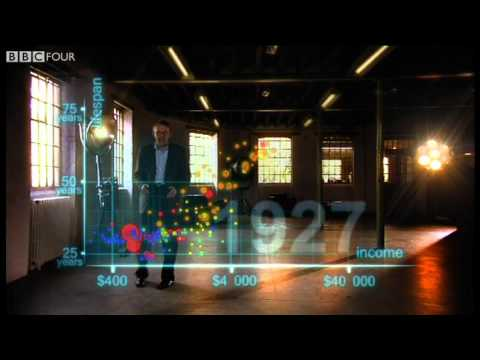

In [2]:
YouTubeVideo('jbkSRLYSojo')

### Part 1: Obtaining and Cleaning Data -- Building Our Own Rosling Plot

The goal of this exercise is to gain some experience in data cleaning, making sense of it with basic plots, and present it in the most "friendly" manner for scientific communication. The two first will be accomplished by using tools from DATA 8, while the latter requires the usage of methods you might not be familiar with yet. However, with this walkthrough, you ought to be more comfortable with building a Rosling Plot of your own in the future.

We start off by importing a Gapminder Foundation Dataset containing **per capita GDP** and **per capita emissions of $CO_2$**.

**Question 1a:** Go on [Gapminder's database](https://www.gapminder.org/data/) and download the dataset on per capita GDP. The website could be a bit tricky to navigate, once you get on the site, scroll down to the *"Choose individual indicators"* section. There, you can find the *GDP per capita* dataset under *Economy -- Incomes & Growth*. Download the dataset as a csv, and upload it to Jupyter as a table called `gdp_table`.

In [ ]:
gdp_table = ...
gdp_table

**Question 1b:** Now, following a similar process, download the dataset on Total CO2 emissions. You should be able to find it under *Environment -- Emissions*. Upload this dataset to Jupyter as a table called `co2_table`.

In [ ]:
co2_table = ...
co2_table

**Question 2a:** For our first Rosling Plot, we will focus on the lastest year of data: 2017. Select the columns for country and per capita GDP in 2017 using the `.select` function.

In [ ]:
income_2017 = ...
income_2017

**Question 2b:** Similarly, for co2_table, select the columns for country and emissions in 2017.

In [ ]:
emissions_2017 = ...
emissions_2017

**Question 3:** We want to have one table containing both income per capita and emissions per capita. Join `income_2017` and `emissions_2017` using the `.join` function. Relabel the columns `gdp per capita` and `total emissions` respectively.

In [ ]:
income_emissions = income_2017.join(...)
income_emissions = income_emissions.relabel(...).relabel(...)
income_emissions

**Question 4:** To construct a Rosling plot effectively, we must know what units each of our columns are in. Assign the units to `gdp per capita` and `emissions per capita` respectively.

gdp per capita: ...
emissions per capita: ...

**Question 5a:** Notice how some of the data in `income_emissions` are denoted in thousands using 'k', and some even are 'nan' values. We don't want that when plotting, thus we must clean these inconsistencies out of our dataset. Start by cleaning out any rows with a `'nan'` entry in `gdp per capita` and `total emissions`.

In [ ]:
income_emissions = income_emissions.where(..., are.not_containing(...))
income_emissions = income_emissions.where(...)
income_emissions

**Question 5b:** Let's extract the column `gdp per capita` using the .column function. Assign this column to `income`.

In [ ]:
income = ...
income

### How do we clean our dataset?

Notice for the column `gdp per capita`, all data values above $10,000 per capita is denoted in thousands. We would like to use the `.split` function to remove the 'k's from our dataset. Let's review using the `.split` function.

Notice when splitting any value that does not contain 'k', the resulting list has length 1.

In [104]:
'569'.split('k')

['569']

However, if the value contains 'k', the resulting list will have a length greater than 1.

In [105]:
'38.3k'.split('k')

['38.3', '']

We can use this to our advantage when filtering all values with 'k' out of our data.

**Question 5c:** Create an array `income_new`. For each value in `income`, if the value contains 'k', split the 'k' from the entry and append that entry multiplied by 1000 to `income_new`. Otherwise, simply append a `float` of the entry to `income_new`.

In [ ]:
income_new = ...
for i in income:
    if len(i.split('k')) > 1:
        income_new = np.append(..., float(...[0])*1000)
    else:
        income_new = np.append(...)
income_new

Awesome! We have cleaned our dataset. Let's now append this array back into our table `income_vs_emissions`.

**Question 5d:** Drop the original `gdp per capita` column, and append a new `gdp per capita` column to `income_emissions_2` using `income_new`. We are using a separate table to avoid any overwrite issues in our dataset.

In [ ]:
income_emissions_2 = ...
income_emissions_2 = income_emissions.with_column(...)
income_emissions_2

**Question 6a:** Unfortunately, a lot of the values in `total emissions` are also denoted in thousands. Let's extract a column `emissions` from the `income_emissions` table first.

In [ ]:
emissions = ...
emissions

**Question 6b:** Worst even, we have millions in this column. Repeating the process we had with cleaning `gdp per capita`, let's clean `emissions`.

In [ ]:
emissions_new = ...)
for i in emissions:
    if ...:
        emissions_new = np.append(...)
    elif ...:
        emissions_new = np.append(...)
    else:
        emissions_new = np.append(...)
emissions_new

**Question 6c:** Now, let's replace the `total emissions` column with the cleaned data in `emissions_new`.

In [ ]:
income_emissions_cleaned = ...
income_emissions_cleaned = ...
income_emissions_cleaned

Finally. That was a huge hassle. Having cleaned our data, let's look at a scatter plot and see if we can make sense of it.

**Question 7:** Create a scatter plot of total CO2 emissions over GDP per capita.

In [ ]:
income_emissions_cleaned.scatter(...)

**Question 8:** What do we observe plotting total CO2 emissions over GDP per capita? Did you observe any outliers? If so, what countries do you think those are?

*Enter your answer here...*

**Question 9:** This plot is hard to read, and is dominated by a few outliers (large emitters and very wealthy nations). Hence, let us take the log of each axis. Percentage changes in GDP per capita should now refer to percentage changes in total emissions in each country.

In [ ]:
gdp_log = np.log(...)
co2_log = np.log(...)

log_table = Table().with_columns('log gdp', ..., 'log co2', ...)
log_table.scatter(..., fit_line = True)
np.polyfit(gdp_log, co2_log, 1)

Using a logged scatter plot, we create a much simpler visualization between gdp per capita and total emissions. We can also use a simply polyfit function to find the line of regression between the two variables.

**Question 10:** Explain one reason why we observe an upward trend in the scatterplot above.

*Enter your answer here...*

### Part 2: Better Visualizations -- A Historical View on $CO_2$ emissions

As of now, it seems like we have a strong linear association between log total $CO_2$ emissions and log GDP per capita. To explore this association further, let us view this from a historical perspective by answering the following question: How has the relationship between the two variables changed over time? To do so, we build the Rosling Plot we sought out in the first place; one for each year the last 120 years.

Most of this section will be focused on reading and understanding why Rosling Plots serve as a better means of visualizing data.

In [126]:
gapminder = Table.read_table('gapminder - gapminder.csv')
gapminder

Unnamed: 0,country,year,population,continent,life_exp,gdp_cap
11,Afghanistan,2007,31889923,Asia,43.828,974.58
23,Albania,2007,3600523,Europe,76.423,5937.03
35,Algeria,2007,33333216,Africa,72.301,6223.37
47,Angola,2007,12420476,Africa,42.731,4797.23
59,Argentina,2007,40301927,Americas,75.32,12779.4
71,Australia,2007,20434176,Oceania,81.235,34435.4
83,Austria,2007,8199783,Europe,79.829,36126.5
95,Bahrain,2007,708573,Asia,75.635,29796
107,Bangladesh,2007,150448339,Asia,64.062,1391.25
119,Belgium,2007,10392226,Europe,79.441,33692.6


In [153]:
population_table = Table.read_table('population_total.csv')
population_table

country,1799,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,1838,1839,1840,1841,1842,1843,1844,1845,1846,1847,1848,1849,1850,1851,1852,1853,1854,1855,1856,1857,1858,1859,1860,1861,1862,1863,1864,1865,1866,1867,1868,1869,1870,1871,1872,1873,1874,1875,1876,1877,1878,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919,1920,1921,1922,1923,1924,1925,1926,1927,1928,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,1939,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050,2051,2052,2053,2054,2055,2056,2057,2058,2059,2060,2061,2062,2063,2064,2065,2066,2067,2068,2069,2070,2071,2072,2073,2074,2075,2076,2077,2078,2079,2080,2081,2082,2083,2084,2085,2086,2087,2088,2089,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099
Afghanistan,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.29M,3.3M,3.31M,3.32M,3.34M,3.35M,3.37M,3.38M,3.4M,3.41M,3.43M,3.45M,3.46M,3.48M,3.49M,3.51M,3.52M,3.54M,3.55M,3.57M,3.59M,3.6M,3.62M,3.63M,3.65M,3.67M,3.68M,3.7M,3.72M,3.73M,3.75M,3.77M,3.79M,3.81M,3.83M,3.84M,3.86M,3.88M,3.9M,3.92M,3.94M,3.96M,3.98M,4M,4.02M,4.04M,4.06M,4.08M,4.1M,4.12M,4.14M,4.16M,4.18M,4.21M,4.23M,4.25M,4.27M,4.29M,4.31M,4.33M,4.35M,4.38M,4.4M,4.42M,4.44M,4.46M,4.49M,4.51M,4.53M,4.55M,4.58M,4.6M,4.62M,4.65M,4.67M,4.69M,4.71M,4.74M,4.76M,4.79M,4.83M,4.88M,4.94M,5M,5.06M,5.13M,5.2M,5.26M,5.33M,5.47M,5.68M,5.98M,6.36M,6.85M,7.37M,7.92M,8.52M,9.17M,9.88M,10.3M,10.6M,10.5M,10.3M,9.71M,9.2M,8.72M,8.26M,7.83M,7.42M,7.1M,6.87M,6.72M,6.64M,6.64M,6.64M,6.64M,6.64M,6.64M,6.64M,6.66M,6.7M,6.77M,6.85M,6.95M,7.06M,7.17M,7.28M,7.39M,7.5M,7.62M,7.75M,7.84M,7.94M,8.04M,8.15M,8.27M,8.4M,8.54M,8.68M,8.83M,9M,9.17M,9.35M,9.54M,9.74M,9.96M,10.2M,10.4M,10.6M,10.9M,11.2M,11.5M,11.8M,12.1M,12.4M,12.7M,12.9M,13.2M,13.3M,13.4M,13.4M,13.2M,12.9M,12.5M,12.2M,11.9M,11.7M,11.6M,11.6M,11.9M,12.4M,13.3M,14.5M,15.8M,17.1M,18.1M,18.9M,19.4M,19.7M,20.2M,20.8M,21.6M,22.6M,23.7M,24.7M,25.7M,26.4M,27.1M,27.7M,28.4M,29.2M,30.1M,31.2M,32.3M,33.4M,34.4M,35.4M,36.3M,37.2M,38M,38.9M,39.8M,40.8M,41.7M,42.6M,43.5M,44.4M,45.4M,46.3M,47.2M,48.1M,49M,49.9M,50.8M,51.7M,52.6M,53.5M,54.3M,55.2M,56.1M,56.9M,57.7M,58.6M,59.4M,60.2M,61M,61.7M,62.5M,63.2M,64M,64.7M,65.4M,66.1M,66.7M,67.4M,68M,68.6M,69.2M,69.8M,70.3M,70.8M,71.4M,71.8M,72.3M,72.8M,73.2M,73.6M,74M,74.3M,74.7M,75M,75.3M,75.5M,75.8M,76M,76.2M,76.4M,76.5M,76.7M,76.8M,76.9M,76.9M,77M,77M,77M,77M,77M,76.9M,76.9M,76.8M,76.7M,76.6M,76.4M,76.3M,76.1M,76M,75.8M,75.6M,75.4M,75.2M,74.9M
Angola,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.58M,1.59M,1.61M,1.64M,1.66M,1.69M,1.71M,1.74M,1.76M,1.79M,1.81M,1.84M,1.87M,1.9M,1.92M,1.95M,1.98M,2.01M,2.04M,2.07M,2.1M,2.13M,2.16M,2.19M,2.23M,2.26M,2.29M,2.33M,2.36M,2.39M,2.42M,2.45M,2.47M,2.49M,2.51M,2.53M,2.55M,2.57M,2.6M,2.62M,2.64M,2.66M,2.68M,2.71M,2.73M,2.75M,2.78M,2.8M,2.82M,2.84M,2.87M,2.89M,2.91M,2.93M,2.94M,2.96M,2.98M,3M,3.02M,3.04M,3.06M,3.08M,3.1M,3.12M,3.14M,3.16M,3.18M,3.2M,3.22M,3.23M,3.24M,3.24M,3.24M,3.23M,3.21M,3.2M,3.19M,3.18M,3.17M,3.15M,3.14M,3.12M,3.1M,3.08M,3.06M,3.04M,3.02M,3M,2.98M,2.96M,2.95M,2.93M,2.92M,2.92M,2.91M,2.9M,2.89M,2.88M,2.87M,2.87M,2.88M,2.

Next, we use the `.join` method to add the continent of each nation to its population. Then, we will select the columns we need: countries, their population for 2017, and their respective continents.

In [154]:
population_continent = population_table.join('country', gapminder)
population_continent

country,1799,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,1838,1839,1840,1841,1842,1843,1844,1845,1846,1847,1848,1849,1850,1851,1852,1853,1854,1855,1856,1857,1858,1859,1860,1861,1862,1863,1864,1865,1866,1867,1868,1869,1870,1871,1872,1873,1874,1875,1876,1877,1878,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919,1920,1921,1922,1923,1924,1925,1926,1927,1928,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,1939,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050,2051,2052,2053,2054,2055,2056,2057,2058,2059,2060,2061,2062,2063,2064,2065,2066,2067,2068,2069,2070,2071,2072,2073,2074,2075,2076,2077,2078,2079,2080,2081,2082,2083,2084,2085,2086,2087,2088,2089,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099,Unnamed: 0,year,population,continent,life_exp,gdp_cap
Afghanistan,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.29M,3.3M,3.31M,3.32M,3.34M,3.35M,3.37M,3.38M,3.4M,3.41M,3.43M,3.45M,3.46M,3.48M,3.49M,3.51M,3.52M,3.54M,3.55M,3.57M,3.59M,3.6M,3.62M,3.63M,3.65M,3.67M,3.68M,3.7M,3.72M,3.73M,3.75M,3.77M,3.79M,3.81M,3.83M,3.84M,3.86M,3.88M,3.9M,3.92M,3.94M,3.96M,3.98M,4M,4.02M,4.04M,4.06M,4.08M,4.1M,4.12M,4.14M,4.16M,4.18M,4.21M,4.23M,4.25M,4.27M,4.29M,4.31M,4.33M,4.35M,4.38M,4.4M,4.42M,4.44M,4.46M,4.49M,4.51M,4.53M,4.55M,4.58M,4.6M,4.62M,4.65M,4.67M,4.69M,4.71M,4.74M,4.76M,4.79M,4.83M,4.88M,4.94M,5M,5.06M,5.13M,5.2M,5.26M,5.33M,5.47M,5.68M,5.98M,6.36M,6.85M,7.37M,7.92M,8.52M,9.17M,9.88M,10.3M,10.6M,10.5M,10.3M,9.71M,9.2M,8.72M,8.26M,7.83M,7.42M,7.1M,6.87M,6.72M,6.64M,6.64M,6.64M,6.64M,6.64M,6.64M,6.64M,6.66M,6.7M,6.77M,6.85M,6.95M,7.06M,7.17M,7.28M,7.39M,7.5M,7.62M,7.75M,7.84M,7.94M,8.04M,8.15M,8.27M,8.4M,8.54M,8.68M,8.83M,9M,9.17M,9.35M,9.54M,9.74M,9.96M,10.2M,10.4M,10.6M,10.9M,11.2M,11.5M,11.8M,12.1M,12.4M,12.7M,12.9M,13.2M,13.3M,13.4M,13.4M,13.2M,12.9M,12.5M,12.2M,11.9M,11.7M,11.6M,11.6M,11.9M,12.4M,13.3M,14.5M,15.8M,17.1M,18.1M,18.9M,19.4M,19.7M,20.2M,20.8M,21.6M,22.6M,23.7M,24.7M,25.7M,26.4M,27.1M,27.7M,28.4M,29.2M,30.1M,31.2M,32.3M,33.4M,34.4M,35.4M,36.3M,37.2M,38M,38.9M,39.8M,40.8M,41.7M,42.6M,43.5M,44.4M,45.4M,46.3M,47.2M,48.1M,49M,49.9M,50.8M,51.7M,52.6M,53.5M,54.3M,55.2M,56.1M,56.9M,57.7M,58.6M,59.4M,60.2M,61M,61.7M,62.5M,63.2M,64M,64.7M,65.4M,66.1M,66.7M,67.4M,68M,68.6M,69.2M,69.8M,70.3M,70.8M,71.4M,71.8M,72.3M,72.8M,73.2M,73.6M,74M,74.3M,74.7M,75M,75.3M,75.5M,75.8M,76M,76.2M,76.4M,76.5M,76.7M,76.8M,76.9M,76.9M,77M,77M,77M,77M,77M,76.9M,76.9M,76.8M,76.7M,76.6M,76.4M,76.3M,76.1M,76M,75.8M,75.6M,75.4M,75.2M,74.9M,11,2007,31889923,Asia,43.828,974.58
Albania,400k,402k,404k,405k,407k,409k,411k,413k,414k,416k,418k,420k,422k,424k,426k,427k,429k,431k,433k,435k,437k,439k,441k,443k,445k,447k,449k,451k,453k,455k,457k,459k,461k,463k,465k,467k,470k,472k,474k,476k,478k,480k,482k,485k,487k,489k,491k,493k,496k,498k,501k,505k,510k,515k,520k,525k,530k,535k,540k,545k,551k,556k,561k,567k,572k,578k,584k,589k,595k,601k,606k,612k,618k,624k,630k,636k,642k,648k,655k,661k,667k,674k,680k,687k,693k,700k,707k,714k,720k,727k,735k,742k,749k,757k,764k,772k,780k,788k,795k,803k,811k,819k,826k,834k,842k,849k,857k,865k,873k,881k,888k,895k,901k,907k,913k,919k,926k,932k,938k,944k,949k,955k,960k,965k,97

We need to clean the column `2017`, similar to before. Notice now we have values in billions, meaning we need an `elif` statement splitting 'B' from values as well.

In [139]:
population_new = make_array()
for i in population_continent.column('2017'):
    if len(i.split('k')) > 1:
        population_new = np.append(population_new, float(i.split('k')[0])*1000)
    elif len(i.split('M')) > 1:
        population_new = np.append(population_new, float(i.split('M')[0])*1000000)
    elif len(i.split('B')) > 1:
        population_new = np.append(population_new, float(i.split('B')[0])*1000000000)
    else:
        population_new = np.append(population_new, float(i))
population_new

array([3.72e+07, 2.88e+06, 4.22e+07, 3.08e+07, 4.44e+07, 2.49e+07,
       8.89e+06, 1.57e+06, 1.61e+08, 1.15e+07, 1.15e+07, 1.14e+07,
       3.32e+06, 2.25e+06, 2.09e+08, 7.05e+06, 1.98e+07, 1.12e+07,
       1.62e+07, 2.52e+07, 3.71e+07, 4.67e+06, 1.55e+07, 1.87e+07,
       1.43e+09, 4.97e+07, 8.32e+05, 8.41e+07, 5.24e+06, 5.00e+06,
       2.51e+07, 4.16e+06, 1.13e+07, 1.07e+07, 5.75e+06, 9.59e+05,
       1.06e+07, 1.71e+07, 9.84e+07, 6.42e+06, 1.31e+06, 3.45e+06,
       1.09e+08, 5.52e+06, 6.50e+07, 2.12e+06, 2.28e+06, 8.31e+07,
       2.98e+07, 1.05e+07, 1.72e+07, 1.24e+07, 1.87e+06, 1.11e+07,
       9.59e+06, 7.37e+06, 9.71e+06, 3.37e+05, 1.35e+09, 2.68e+08,
       8.18e+07, 3.84e+07, 4.82e+06, 8.38e+06, 6.06e+07, 2.93e+06,
       1.27e+08, 9.97e+06, 5.14e+07, 4.14e+06, 6.86e+06, 2.11e+06,
       4.82e+06, 6.68e+06, 2.63e+07, 1.81e+07, 3.15e+07, 1.91e+07,
       4.40e+06, 1.27e+06, 1.26e+08, 3.17e+06, 6.28e+05, 3.60e+07,
       2.95e+07, 5.37e+07, 2.45e+06, 2.81e+07, 1.71e+07, 4.74e

In [155]:
population_continent_2017 = population_continent.select('country', 'continent').with_column('2017 population', population_new)
population_continent_2017

country,continent,2017 population
Afghanistan,Asia,3.72e+07
Albania,Europe,2.88e+06
Algeria,Africa,4.22e+07
Angola,Africa,3.08e+07
Argentina,Americas,4.44e+07
Australia,Oceania,2.49e+07
Austria,Europe,8.89e+06
Bahrain,Asia,1.57e+06
Bangladesh,Asia,1.61e+08
Belgium,Europe,1.15e+07


Now, we will join `income_emissions_cleaned` to `population_continent` to create a table containing country, population, continent, total emissions, and gdp per capita, to construct our bubble plot.

In [156]:
bubble_table = income_emissions_cleaned.join('country', population_continent_2017)
bubble_table = bubble_table.select('country', 'total emissions', 'gdp per capita','2017 population','continent')
bubble_table.sort('total emissions', descending=True)

country,total emissions,gdp per capita,2017 population,continent
China,1.01e+07,9690,1.43e+09,Asia
United States,5.42e+06,59800,3.27e+08,Americas
India,2.66e+06,1920,1.35e+09,Asia
Japan,1.16e+06,36200,1.27e+08,Asia
Germany,760000,43000,8.31e+07,Europe
Iran,721000,5200,8.18e+07,Asia
Saudi Arabia,622000,20100,3.37e+07,Asia
Indonesia,615000,3730,2.68e+08,Asia
Canada,569000,44800,3.71e+07,Americas
Mexico,478000,9950,1.26e+08,Americas


Using this newly created table, we can visualize the log-plot from above in a "friendlier" manner using an imported method called Seaborn. Feel free to check out its documentation here: https://seaborn.pydata.org/generated/seaborn.scatterplot.html



/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


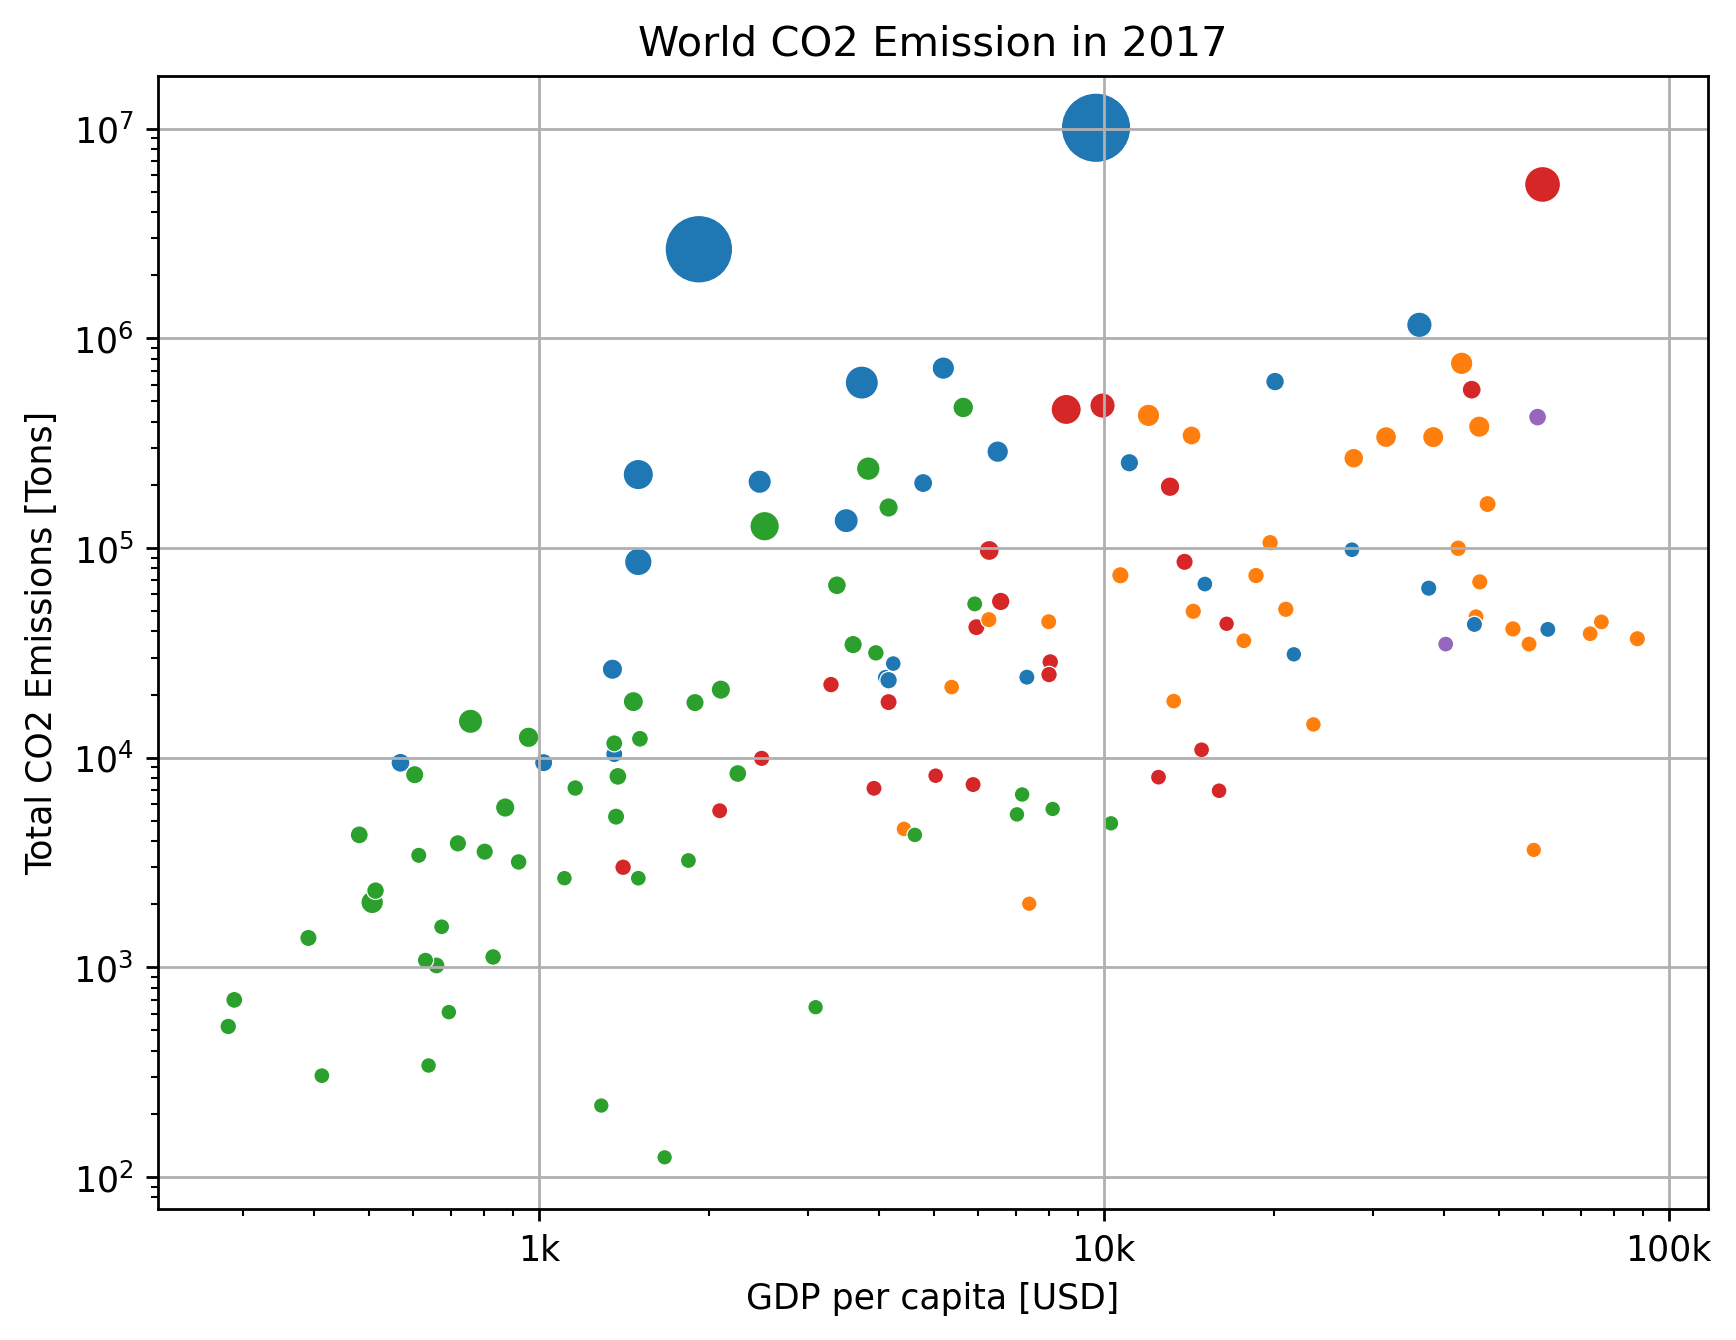

In [151]:
population = bubble_table.column('2017 population')
plt.figure(figsize = (8,6), dpi=250)
sns.scatterplot(bubble_table.column('gdp per capita'), bubble_table.column('total emissions'), hue = bubble_table.column('continent'), size= population, sizes=(20,400), legend=False);
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('GDP per capita [USD]')
plt.ylabel('Total CO2 Emissions [Tons]')
plt.title('World CO2 Emission in 2017')
plt.xticks([1000, 10000, 100000],['1k', '10k', '100k'])
plt.show();

So, this was our Rosling Plot for 2017.

**Question 11:** The Rosling Plot is a much cleaner visualization of our data. Through the plot, what observations could you make? Which continents emitted more $CO2$? Do countries with higher GDP per capita typically emit more $CO2$? What relation does this have with their population?

*Enter your answer here...*

From here, we can create a function that we can apply to each year in our original dataset. Note that the y-axis is the log of $CO2$ emissions per capita, instead of total emissions, hence its difference with the plot we made above. By plotting $CO2$ emissions per capita over gdp per capita, we get a sense of the $CO_2$ intensity of GDP.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


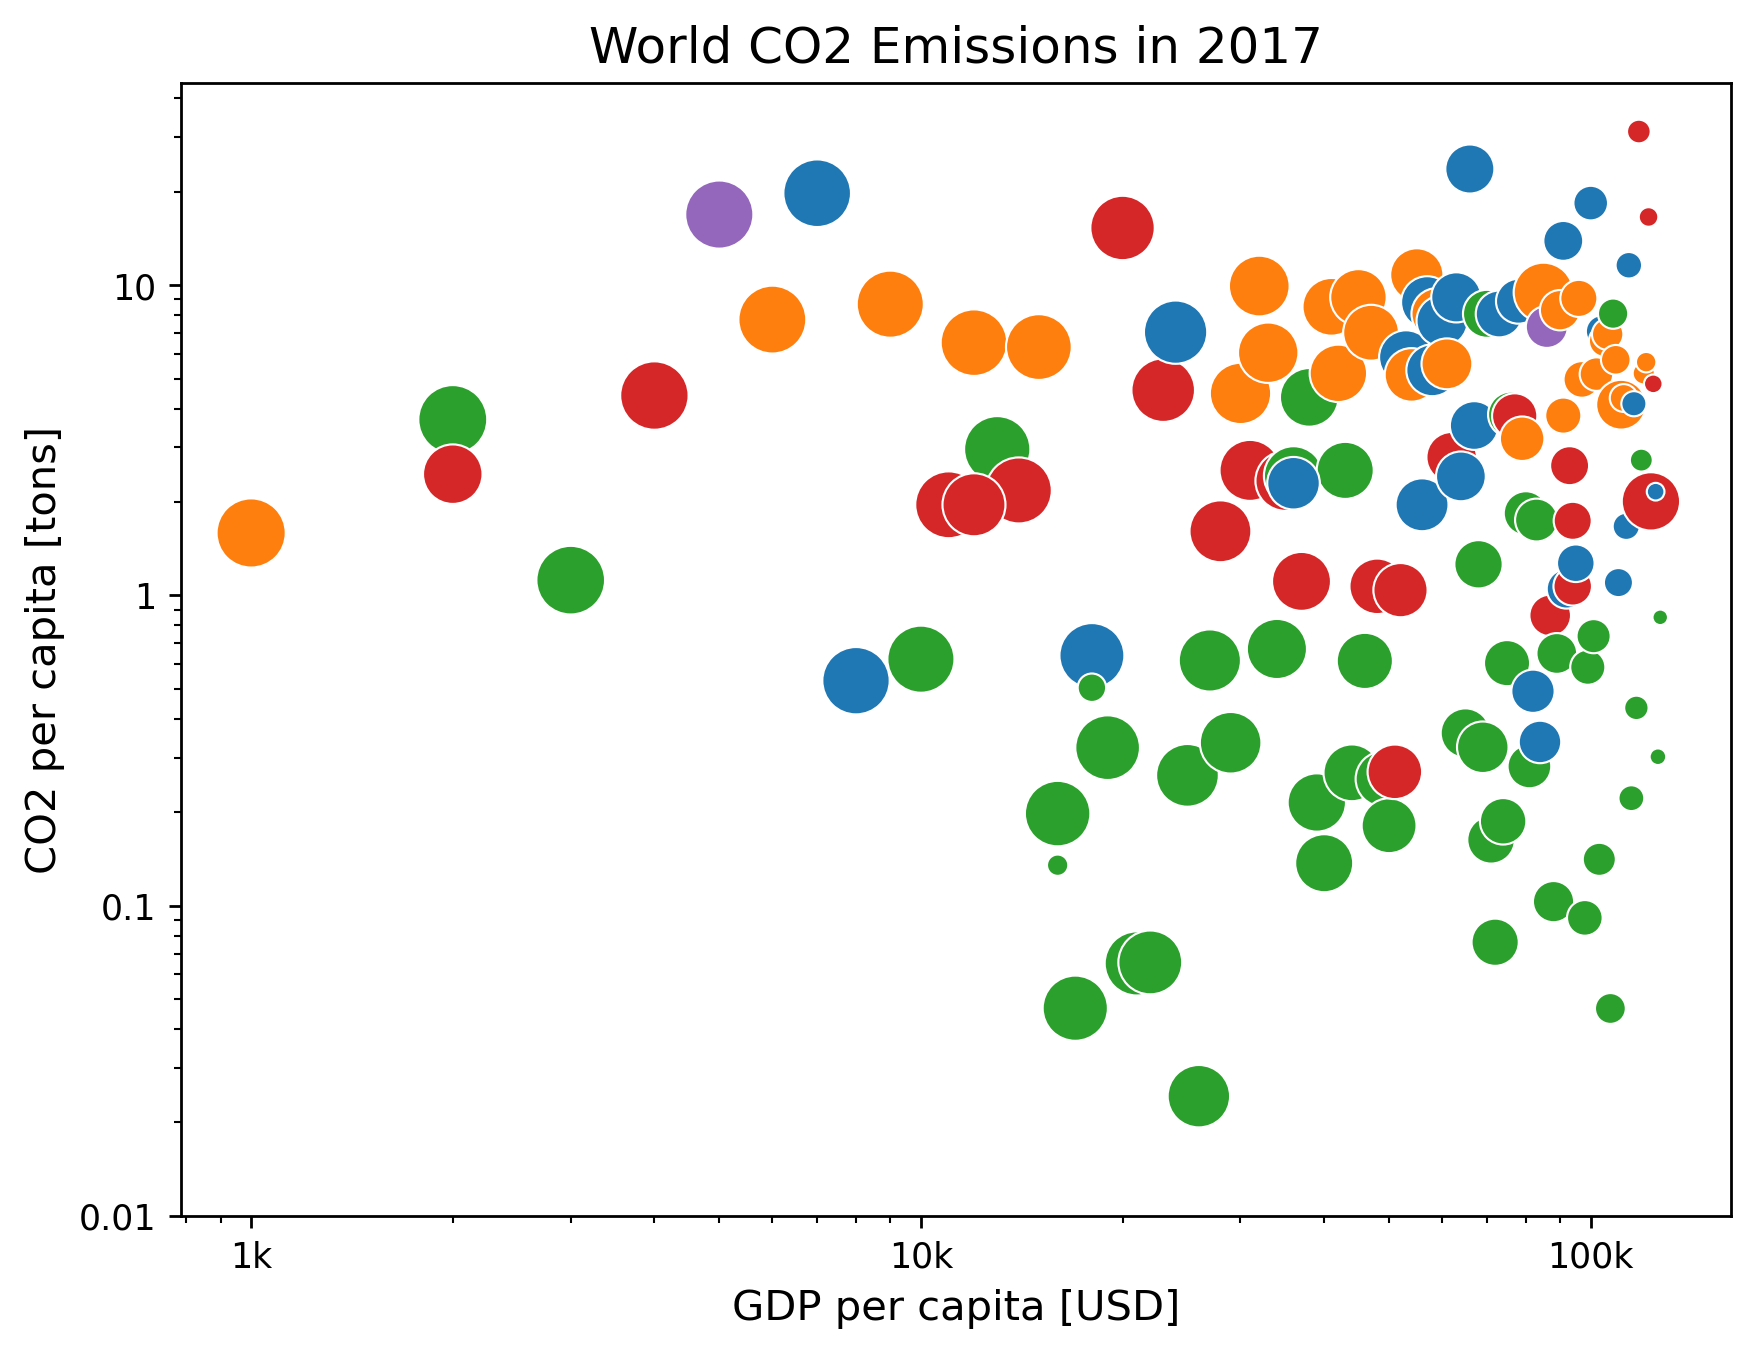

In [157]:
#Changing from total to per capita CO2 Emissions

def the_bubble_plot(emissions_data, population_data, income_data, geography_data, year):
    
    #Selecting data for given year & relabel columns
    emissions_data = emissions_data.select('country', f"{year}").relabel(1, 'CO2 per capita [tons]')
    population_data = population_data.select('country', f"{year}").relabel(1, 'Population')
    income_data = income_data.select('country', f"{year}").relabel(1, 'GDP per capita [USD]')

    #Creating the 'the_bubble_table' with emission, population, income, continent for given year
    the_bubble_table = emissions_data.join('country', population_data)
    the_bubble_table = the_bubble_table.join('country', income_data)
    the_bubble_table = the_bubble_table.join('country', geography_data)

    #Making sure we actually have emissions data for given year!
    the_bubble_table = the_bubble_table.where('CO2 per capita [tons]', are.above(0))
    #the_bubble_table.sort('CO2 per capita [tons]',descending=True)
    
    plt.figure(figsize = (8,6), dpi=250)
    
    #Using the Seaborn Scatterplot function imported
    population = the_bubble_table.column('Population')
    fig = sns.scatterplot(the_bubble_table.column('GDP per capita [USD]'),
    the_bubble_table.column('CO2 per capita [tons]'), 
    hue = the_bubble_table.column('continent'), 
    size= population, sizes=(20,400), legend=False)
    
    #Adjusting the plot for better vizualisation
    plt.grid(False)
    
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('GDP per capita [USD]', fontsize='large')
    plt.ylabel('CO2 per capita [tons]', fontsize='large')
    plt.title(f"World CO2 Emissions in {year}", fontsize='x-large')
    plt.xticks([10**0, 10**1, 10**2],['1k','10k', '100k'])
    plt.yticks([10**-2, 10**-1, 10**0, 10**1],['0.01','0.1','1', '10'])
    plt.show()
    

    

#Importing data from the Gapminder Foundation
emissions_data = Table.read_table('co2_emissions_tonnes_per_person.csv')
population_data = Table.read_table('population_total.csv')
income_data = Table.read_table('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
geography_data = Table.read_table('gapminder - gapminder.csv').select('country', 'continent')

the_bubble_plot(emissions_data, population_data, income_data, geography_data, 2017);

**Question 12:** Using the function `the_bubble_plot`, draw the Rosling plot for $CO2$ per capita over GDP per capita for two years of your choice. Try to plot two years that are quite far apart, or else you might not observe too great of a difference between the plots.

In [ ]:
year_1 = ...
year_2 = ...

the_bubble_plot(emissions_data, population_data, income_data, geography_data, year_1)
the_bubble_plot(emissions_data, population_data, income_data, geography_data, year_2)

**Question 13:** Compare the two Rosling plots, what do you observe? Do countries generally become richer and emit more CO2 overtime? Why? How may this relate to the environmental Kuznets curve hypothesis?

*Enter your answer here...*

**Congratulations! You finished Lab 8!**